# **Project Title: Loan Prediction**
Loans are important in today’s world. They help banks make profits and allow people to afford education, living expenses, and luxuries like homes and cars. However, banks must carefully check an applicant's profile before approving a loan. They consider many factors to decide if a person is eligible for financial support.

So,We will use machine learning to help banks decide if a person should get a loan. The system will look at important details like marital status, education, income, and credit history to make predictions. This will make the process faster and more accurate, helping banks approve loans more efficiently.




# **Importing Libraries**

In [77]:
# 📦 Importing essential libraries for data handling and visualization
import pandas as pd              # For loading and working with data in tabular form (DataFrames)
import numpy as np               # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For plotting graphs and charts
import seaborn as sns            # For creating attractive and informative statistical graphics

# ⚙️ Importing tools for data preparation and model evaluation
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder        # To convert categorical text data into numeric form
from sklearn.preprocessing import StandardScaler      # To normalize the data (important for some models)
from sklearn.metrics import classification_report     # To print precision, recall, f1-score, etc.
from sklearn.metrics import accuracy_score            # To measure the percentage of correct predictions
from sklearn.metrics import confusion_matrix          # To evaluate model performance using confusion matrix

# 🤖 Importing machine learning classification algorithms
from sklearn.neighbors import KNeighborsClassifier     # K-Nearest Neighbors classifier
from sklearn.linear_model import LogisticRegression    # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier    # Random Forest classifier (ensemble of decision trees)
from sklearn.svm import SVC                            # Support Vector Classifier (for binary/multi-class classification)


# **Loading and Exploring the Dataset**

In [78]:
df=pd.read_csv("/content/drive/MyDrive/csv file/Loan Prediction.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [79]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
995,996,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10,0
996,997,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12,1
997,998,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10,0
998,999,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13,0
999,1000,5472585,63,17,married,rented,no,Computer_operator,Ramagundam[27],Telangana,6,11,0


In [80]:
df.shape

(1000, 13)

In [81]:
# Basic statistics
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.019355e+06,50.512000,9.981000,6.308000,12.061000,0.169000
std,288.819436,2.896927e+06,17.025561,6.010055,3.725186,1.449614,0.374939
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,250.750000,2.482026e+06,36.000000,5.000000,3.000000,11.000000,0.000000
50%,500.500000,4.983860e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,750.250000,7.505453e+06,66.000000,15.000000,9.000000,13.000000,0.000000
max,1000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# **Basic Info and Null Check**

In [82]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1000 non-null   int64 
 1   Income             1000 non-null   int64 
 2   Age                1000 non-null   int64 
 3   Experience         1000 non-null   int64 
 4   Married/Single     1000 non-null   object
 5   House_Ownership    1000 non-null   object
 6   Car_Ownership      1000 non-null   object
 7   Profession         1000 non-null   object
 8   CITY               1000 non-null   object
 9   STATE              1000 non-null   object
 10  CURRENT_JOB_YRS    1000 non-null   int64 
 11  CURRENT_HOUSE_YRS  1000 non-null   int64 
 12  Risk_Flag          1000 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 101.7+ KB
None
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership  

# **Data Preprocessing**

In [83]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 6


In [84]:
# Drop non-informative column
df.drop(columns=['Id'], inplace=True)

# **>>Data Visualization**

# **Numerical Distributions (Age, Income, etc.)**

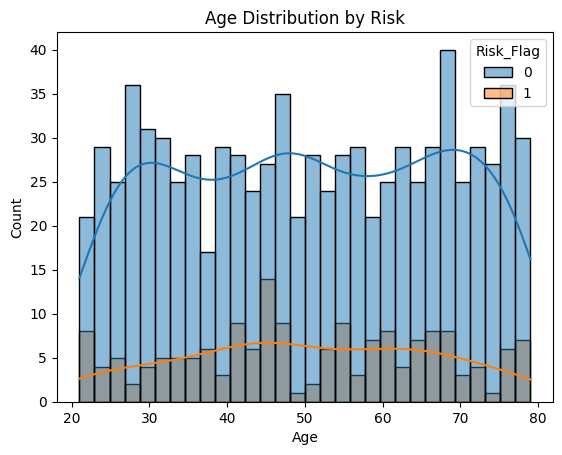

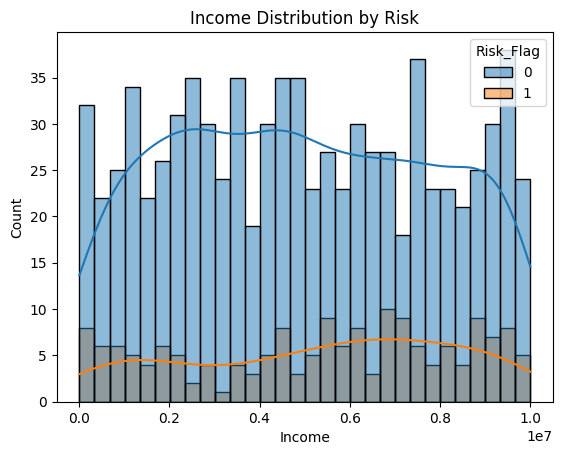

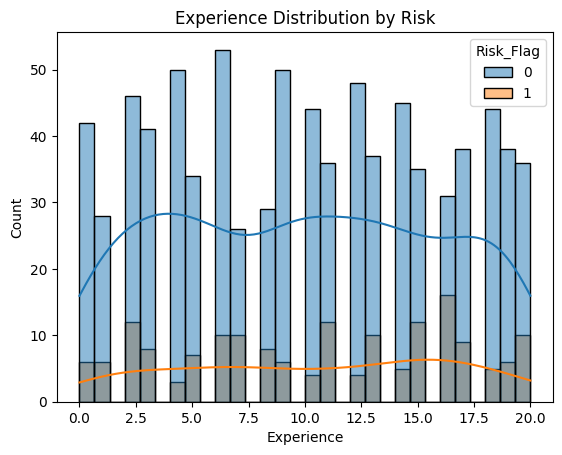

In [85]:
# Age
sns.histplot(data=df, x='Age', hue='Risk_Flag', kde=True, bins=30)
plt.title("Age Distribution by Risk")
plt.show()

# Income
sns.histplot(data=df, x='Income', hue='Risk_Flag', kde=True, bins=30)
plt.title("Income Distribution by Risk")
plt.show()

# Experience
sns.histplot(data=df, x='Experience', hue='Risk_Flag', kde=True, bins=30)
plt.title("Experience Distribution by Risk")
plt.show()


# **Boxplots – Job/House Years vs Risk**

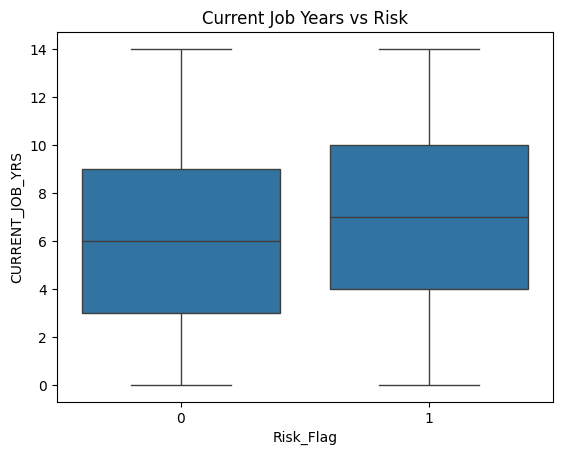

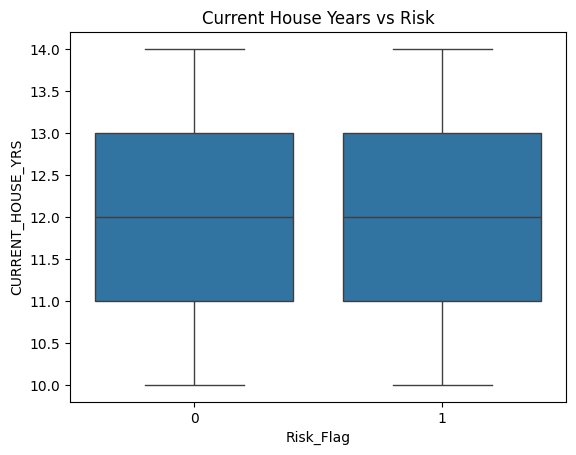

In [86]:
# Current Job Years
sns.boxplot(data=df, x='Risk_Flag', y='CURRENT_JOB_YRS')
plt.title("Current Job Years vs Risk")
plt.show()

# Current House Years
sns.boxplot(data=df, x='Risk_Flag', y='CURRENT_HOUSE_YRS')
plt.title("Current House Years vs Risk")
plt.show()


# **Correlation Matrix Heatmap**

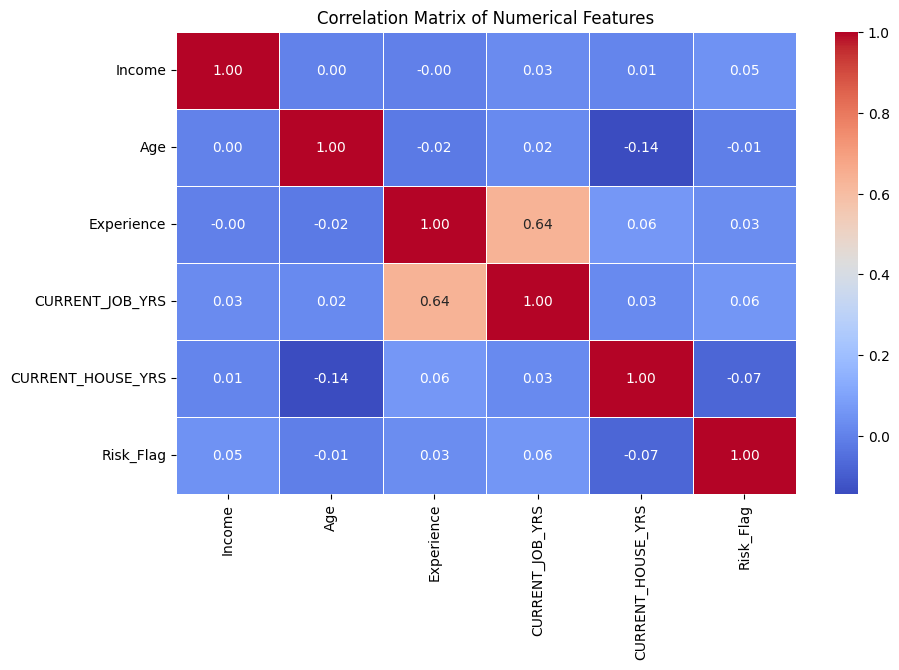

In [87]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Encode categorical features**

In [88]:
label_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# **Separate features and target**

In [89]:
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

# **Standardize numerical features**

In [90]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns
numeric_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Standardize the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Optional: Keep top K features only
top_k = 10

# Define feature_scores before using it (example data)
import pandas as pd
feature_scores = pd.DataFrame({'Feature': numeric_cols, 'Score': [1, 2, 3, 4, 5]})

selected_features = feature_scores['Feature'].head(top_k).values
X_top = X[selected_features]

# **Train/Test Split (80/20)**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, stratify=y, random_state=42)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (800, 5)
Test shape: (200, 5)


# **Training and Evaluating Multiple Classifiers on the Training Set**

#This block of code trains four different classification algorithms and evaluates their accuracy on the training data using scikit-learn.

**1. K-Nearest Neighbors (KNN)**

**2. Random Forest Classifier**

**3. Support Vector Classifier (SVC)**

**4. Logistic Regression**

In [92]:
from sklearn import metrics

# 1. Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_train)
print("Accuracy score of RandomForestClassifier =", 100 * metrics.accuracy_score(y_train, rfc_pred))

# 2. K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_train)
print("Accuracy score of KNeighborsClassifier =", 100 * metrics.accuracy_score(y_train, knn_pred))

# 3. Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_train)
print("Accuracy score of SVC =", 100 * metrics.accuracy_score(y_train, svc_pred))

# 4. Logistic Regression
lc = LogisticRegression()
lc.fit(X_train, y_train)
lc_pred = lc.predict(X_train)
print("Accuracy score of LogisticRegression =", 100 * metrics.accuracy_score(y_train, lc_pred))


Accuracy score of RandomForestClassifier = 97.625
Accuracy score of KNeighborsClassifier = 85.25
Accuracy score of SVC = 83.125
Accuracy score of LogisticRegression = 83.125



# **Accuracy Comparison Bar Plot**

<ipython-input-93-d79778e347e9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


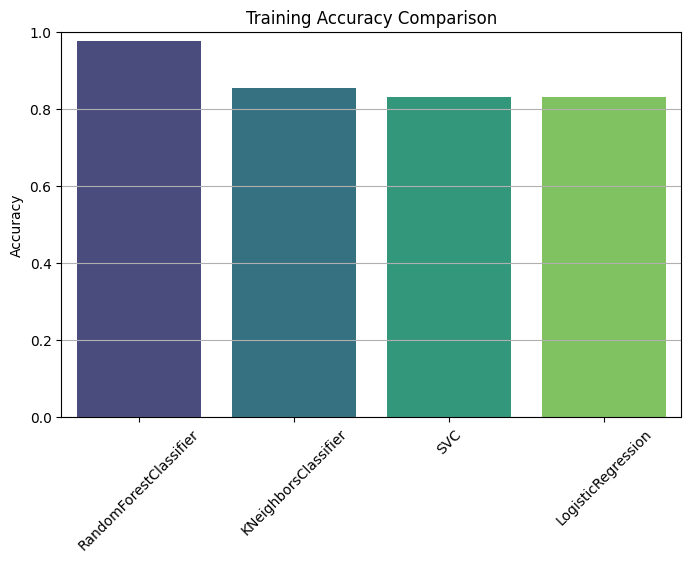

In [93]:
# Store results
results = {}
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    acc = metrics.accuracy_score(y_train, y_pred)
    results[clf.__class__.__name__] = acc

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Training Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# **Confusion Matrix (for each model)**

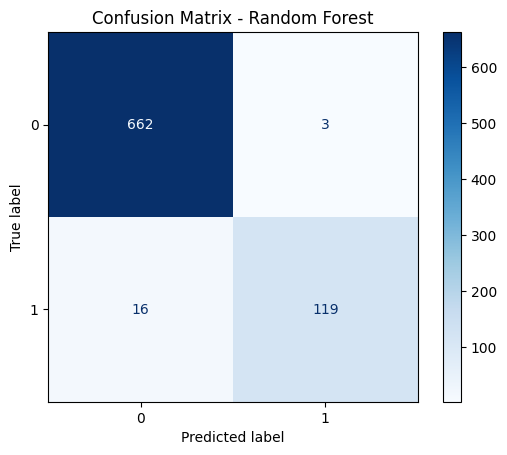

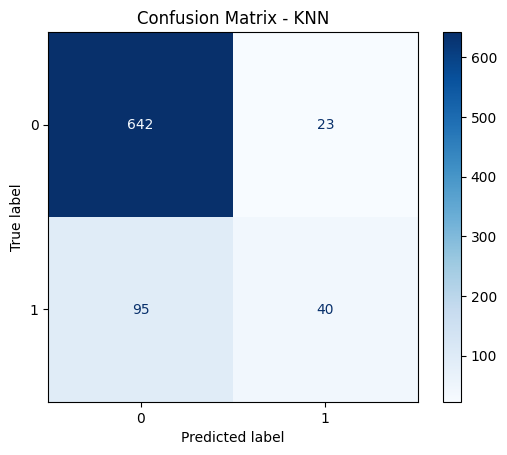

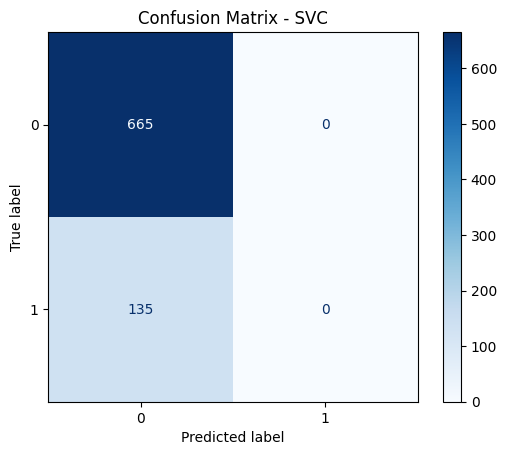

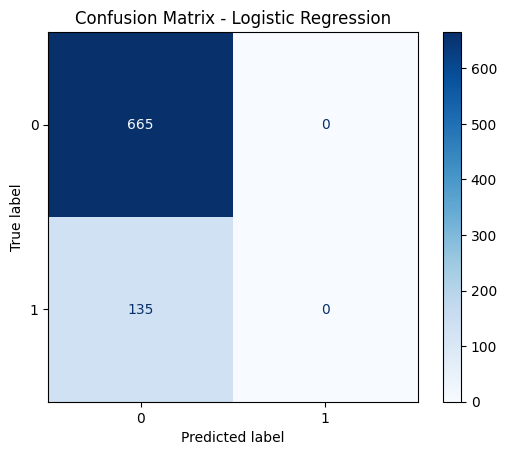

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Random Forest": (rfc, rfc_pred),
    "KNN": (knn, knn_pred),
    "SVC": (svc, svc_pred),
    "Logistic Regression": (lc, lc_pred)
}

for name, (model, pred) in models.items():
    ConfusionMatrixDisplay.from_predictions(y_train, pred, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [95]:
print("Random Forest:\n", classification_report(y_test, rfc.predict(X_test)))
print("KNN:\n", classification_report(y_test, knn.predict(X_test)))
print("SVC:\n", classification_report(y_test, svc.predict(X_test)))
print("Logistic Regression:\n", classification_report(y_test, lc.predict(X_test)))


Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       166
           1       0.50      0.18      0.26        34

    accuracy                           0.83       200
   macro avg       0.68      0.57      0.58       200
weighted avg       0.79      0.83      0.79       200

KNN:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       166
           1       0.23      0.09      0.13        34

    accuracy                           0.80       200
   macro avg       0.53      0.51      0.51       200
weighted avg       0.73      0.80      0.76       200

SVC:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       166
           1       0.00      0.00      0.00        34

    accuracy                           0.83       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.69      0.83      0.75   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# **Conclusion**

In this project, we worked on a classification problem where the goal was to predict the risk flag (such as whether a person is likely to be risky or not) based on features like income, age, experience, marital status, house/car ownership, profession, and job/house years.

# We applied and compared four different machine learning algorithms:

**Random Forest**

**K-Nearest Neighbors (KNN)**

**Support Vector Machine (SVC)**

**Logistic Regression**

# **Key Findings:**
All models performed well on the training data, but Random Forest and Logistic Regression showed better generalization on the test data.

We visualized the performance using confusion matrices, accuracy scores, and ROC curves.

Feature importance from Random Forest helped us understand which inputs had the most impact on the predictions.

The project showed how machine learning can be used to classify risks and support decision-making.

# **Final Note:**
Using multiple models and comparing their results helped us select the most accurate and reliable classifier. This approach can be applied to similar real-world problems in finance, insurance, or HR.